# **Traditional LSTM | Next Day Predictions | Not Normalized**

In [1]:
import numpy  as np
import pandas as pd

## Read In Datasets

* `msftNextDayNotNorm.csv`
* `appleNextDayNotNorm.csv`
* `djiaNextDayNotNorm.csv`

In [2]:
aaplDf = pd.read_csv('appleNextDayNotNorm.csv')
msftDf = pd.read_csv('msftNextDayNotNorm.csv')
djiaDf = pd.read_csv('djiaNextDayNotNorm.csv')

## Drop Attributes That Can't Be Used as Features

In [3]:
# Stock and Sentiment features

aaplDf = aaplDf.drop(columns=['Unnamed: 0'])
msftDf = msftDf.drop(columns=['Unnamed: 0'])
djiaDf = djiaDf.drop(columns=['Unnamed: 0'])

# Only stock Features

# aaplDf = aaplDf.drop(columns=['Unnamed: 0', 'neg', 'neu', 'pos', 'compound'])
# msftDf = msftDf.drop(columns=['Unnamed: 0', 'neg', 'neu', 'pos', 'compound'])
# djiaDf = djiaDf.drop(columns=['Unnamed: 0', 'neg', 'neu', 'pos', 'compound'])

# Only Sentiment 

# aaplDf = aaplDf.drop(columns=['Unnamed: 0', 'Open', 'High', 'Low', 'Close', 'Volume'])
# msftDf = msftDf.drop(columns=['Unnamed: 0', 'Open', 'High', 'Low', 'Close', 'Volume'])
# djiaDf = djiaDf.drop(columns=['Unnamed: 0', 'Open', 'High', 'Low', 'Close', 'Volume'])

In [4]:
#aaplDf.head()
#msftDf.head()
djiaDf.head()

,neg,neu,pos,compound,Open,High,Low,Close,Volume,label
0,0.218,0.705,0.078,-0.9972,12210.12988,12331.86035,12195.32031,12280.32031,266350000,1
1,0.212,0.748,0.040,-0.9943,12277.70996,12369.23047,12206.95996,12289.75977,240760000,0
2,0.167,0.732,0.101,-0.9728,12286.33984,12286.66992,12079.12988,12083.76953,247120000,1
3,0.150,0.770,0.080,-0.9681,12089.62988,12269.24023,12076.92969,12141.58008,260960000,1
4,0.188,0.731,0.081,-0.9952,12144.58984,12310.28027,12144.58984,12307.34961,247980000,0


## Split into Data (`x`) and Label (`y`) Sets

In [5]:
yAppl = aaplDf['label']
xAppl = aaplDf.drop(columns = ['label'])

yMsft = msftDf['label']
xMsft = msftDf.drop(columns = ['label'])

yDjia = djiaDf['label']
xDjia = djiaDf.drop(columns = ['label'])

## Split into Train and Test Sets

In [6]:
from sklearn.model_selection import train_test_split
# 90 - 10 : Train - Test Split
xTrainAppl, xTestAppl, yTrainAppl, yTestAppl = train_test_split(xAppl, yAppl, test_size=0.1, shuffle = False)
xTrainMsft, xTestMsft, yTrainMsft, yTestMsft = train_test_split(xMsft, yMsft, test_size=0.1, shuffle = False)
xTrainDjia, xTestDjia, yTrainDjia, yTestDjia = train_test_split(xDjia, yDjia, test_size=0.1, shuffle = False)

## Normalize the Data (`x`) Sets Using `MinMaxScaler`

In [7]:
from sklearn.preprocessing import MinMaxScaler

def scaleX(trainX, testX):
    scaler = MinMaxScaler()
    scaler.fit(trainX)
    trainX = scaler.transform(trainX)
    testX  = scaler.transform(testX)
    return trainX, testX

xTrainAppl, xTestAppl = scaleX(xTrainAppl, xTestAppl)
xTrainMsft, xTestMsft = scaleX(xTrainMsft, xTestMsft)
xTrainDjia, xTestDjia = scaleX(xTrainDjia, xTestDjia)

## Convert Label (`y`) Sets to `numpy` arrays

In [8]:
yTrainAppl = np.array(yTrainAppl.values.tolist())
yTestAppl  = np.array(yTestAppl.values.tolist())

yTrainMsft = np.array(yTrainMsft.values.tolist())
yTestMsft  = np.array(yTestMsft.values.tolist())

yTrainDjia = np.array(yTrainDjia.values.tolist())
yTestDjia  = np.array(yTestDjia.values.tolist())

## Reshape Data(`x`) Sets Using `numpy`

In [9]:
xTrainAppl = np.reshape(xTrainAppl, (len(xTrainAppl) , 1 , xTrainAppl.shape[1]) ) # 5 because there are 5 features
xTestAppl  = np.reshape(xTestAppl,  (len(xTestAppl)  , 1 , xTestAppl.shape[1]) ) # 5 because there are 5 features

xTrainMsft = np.reshape(xTrainMsft, (len(xTrainMsft) , 1 , xTrainMsft.shape[1]) ) # 5 because there are 5 features
xTestMsft  = np.reshape(xTestMsft,  (len(xTestMsft)  , 1 , xTestMsft.shape[1]) ) # 5 because there are 5 features

xTrainDjia = np.reshape(xTrainDjia, (len(xTrainDjia) , 1 , xTrainDjia.shape[1]) ) # 5 because there are 5 features
xTestDjia  = np.reshape(xTestDjia,  (len(xTestDjia)  , 1 , xTestDjia.shape[1]) ) # 5 because there are 5 features

## Traditional LSTM

In [10]:
import tensorflow   as     tf
from   tensorflow   import keras
from   keras        import Sequential
from   keras.layers import Dense
from   keras.layers import LSTM
from   keras.layers import Dropout

In [11]:
def makeLSTM(xTrain):
    model = Sequential()
    model.add (LSTM  (units = 50, activation = 'relu', input_shape = (xTrain.shape[1], xTrain.shape[2]), return_sequences=True)) # input_shape = (n_steps, n_features)
#     model.add(Dropout(0.25))
    model.add (LSTM  (units = 25, activation = 'relu', return_sequences=True)) # input_shape = (n_steps, n_features)
#     model.add(Dropout(0.25))
    model.add (Dense (units = 1, activation = 'sigmoid'))
    opt = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer = opt, loss = "binary_crossentropy", metrics=['accuracy'])
    return model

### Make LSTM for Each Set

In [12]:
applLSTM = makeLSTM(xTrainAppl)
msftLSTM = makeLSTM(xTrainMsft)
djiaLSTM = makeLSTM(xTrainDjia)

### Fit Model for Each Set

In [13]:
applHist = applLSTM.fit(xTrainAppl, yTrainAppl, batch_size = 72, validation_data=(xTestAppl, yTestAppl), epochs = 500, shuffle=False)
msftHist = msftLSTM.fit(xTrainMsft, yTrainMsft, batch_size = 72, validation_data=(xTestMsft, yTestMsft), epochs = 500, shuffle=False)
djiaHist = applLSTM.fit(xTrainDjia, yTrainDjia, batch_size = 72, validation_data=(xTestDjia, yTestDjia), epochs = 500, shuffle=False)

Epoch 1/500
30/30 [==============================] - 0s 11ms/step - loss: 0.6932 - accuracy: 0.4897 - val_loss: 0.6930 - val_accuracy: 0.5408
Epoch 2/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5012 - val_loss: 0.6925 - val_accuracy: 0.5451
Epoch 3/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5012 - val_loss: 0.6922 - val_accuracy: 0.5451
Epoch 4/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5012 - val_loss: 0.6920 - val_accuracy: 0.5451
Epoch 5/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5012 - val_loss: 0.6918 - val_accuracy: 0.5451
Epoch 6/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5012 - val_loss: 0.6915 - val_accuracy: 0.5451
Epoch 7/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5012 - val_loss: 0.6914 - val_accuracy: 0.5451
Epoch 8/500


Epoch 59/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.5376 - val_loss: 0.7042 - val_accuracy: 0.4721
Epoch 60/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.5347 - val_loss: 0.7036 - val_accuracy: 0.4764
Epoch 61/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.5337 - val_loss: 0.7037 - val_accuracy: 0.4721
Epoch 62/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.5352 - val_loss: 0.7038 - val_accuracy: 0.4764
Epoch 63/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.5333 - val_loss: 0.7038 - val_accuracy: 0.4764
Epoch 64/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.5318 - val_loss: 0.7045 - val_accuracy: 0.4764
Epoch 65/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.5376 - val_loss: 0.7039 - val_accuracy: 0.4807
Epoch 

30/30 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.5452 - val_loss: 0.7011 - val_accuracy: 0.4635
Epoch 117/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5438 - val_loss: 0.7011 - val_accuracy: 0.4721
Epoch 118/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.5433 - val_loss: 0.7015 - val_accuracy: 0.4678
Epoch 119/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.5452 - val_loss: 0.7010 - val_accuracy: 0.4678
Epoch 120/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5452 - val_loss: 0.7016 - val_accuracy: 0.4635
Epoch 121/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.5452 - val_loss: 0.7013 - val_accuracy: 0.4678
Epoch 122/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5457 - val_loss: 0.7016 - val_accuracy: 0.4721
Epoch 123/500

30/30 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.5524 - val_loss: 0.6991 - val_accuracy: 0.4678
Epoch 174/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6892 - accuracy: 0.5539 - val_loss: 0.6992 - val_accuracy: 0.4592
Epoch 175/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.5472 - val_loss: 0.6987 - val_accuracy: 0.4506
Epoch 176/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5534 - val_loss: 0.6991 - val_accuracy: 0.4549
Epoch 177/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5515 - val_loss: 0.6988 - val_accuracy: 0.4635
Epoch 178/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5539 - val_loss: 0.6991 - val_accuracy: 0.4549
Epoch 179/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5495 - val_loss: 0.6984 - val_accuracy: 0.4592
Epoch 180/500

30/30 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.5534 - val_loss: 0.6975 - val_accuracy: 0.4807
Epoch 231/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6866 - accuracy: 0.5577 - val_loss: 0.6970 - val_accuracy: 0.4764
Epoch 232/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6863 - accuracy: 0.5539 - val_loss: 0.6968 - val_accuracy: 0.4807
Epoch 233/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6863 - accuracy: 0.5562 - val_loss: 0.6969 - val_accuracy: 0.4893
Epoch 234/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6860 - accuracy: 0.5519 - val_loss: 0.6969 - val_accuracy: 0.4764
Epoch 235/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6863 - accuracy: 0.5548 - val_loss: 0.6967 - val_accuracy: 0.4807
Epoch 236/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6859 - accuracy: 0.5543 - val_loss: 0.6969 - val_accuracy: 0.4764
Epoch 237/500

30/30 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.5582 - val_loss: 0.6972 - val_accuracy: 0.4979
Epoch 288/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6831 - accuracy: 0.5572 - val_loss: 0.6968 - val_accuracy: 0.4979
Epoch 289/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.5548 - val_loss: 0.6971 - val_accuracy: 0.4936
Epoch 290/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6831 - accuracy: 0.5586 - val_loss: 0.6973 - val_accuracy: 0.4979
Epoch 291/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6831 - accuracy: 0.5586 - val_loss: 0.6966 - val_accuracy: 0.4936
Epoch 292/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.5577 - val_loss: 0.6973 - val_accuracy: 0.4893
Epoch 293/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6831 - accuracy: 0.5586 - val_loss: 0.6971 - val_accuracy: 0.4979
Epoch 294/500

30/30 [==============================] - 0s 2ms/step - loss: 0.6806 - accuracy: 0.5673 - val_loss: 0.6962 - val_accuracy: 0.4979
Epoch 345/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6801 - accuracy: 0.5615 - val_loss: 0.6964 - val_accuracy: 0.5064
Epoch 346/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.5639 - val_loss: 0.6960 - val_accuracy: 0.4936
Epoch 347/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6799 - accuracy: 0.5634 - val_loss: 0.6962 - val_accuracy: 0.4893
Epoch 348/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6800 - accuracy: 0.5649 - val_loss: 0.6954 - val_accuracy: 0.4936
Epoch 349/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6797 - accuracy: 0.5649 - val_loss: 0.6963 - val_accuracy: 0.4850
Epoch 350/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6800 - accuracy: 0.5658 - val_loss: 0.6953 - val_accuracy: 0.4936
Epoch 351/500

30/30 [==============================] - 0s 2ms/step - loss: 0.6761 - accuracy: 0.5677 - val_loss: 0.6929 - val_accuracy: 0.5064
Epoch 402/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6770 - accuracy: 0.5730 - val_loss: 0.6936 - val_accuracy: 0.5150
Epoch 403/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6761 - accuracy: 0.5687 - val_loss: 0.6933 - val_accuracy: 0.5064
Epoch 404/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6768 - accuracy: 0.5764 - val_loss: 0.6935 - val_accuracy: 0.5107
Epoch 405/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6757 - accuracy: 0.5673 - val_loss: 0.6927 - val_accuracy: 0.4979
Epoch 406/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6770 - accuracy: 0.5730 - val_loss: 0.6933 - val_accuracy: 0.5150
Epoch 407/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6758 - accuracy: 0.5697 - val_loss: 0.6928 - val_accuracy: 0.4807
Epoch 408/500

30/30 [==============================] - 0s 2ms/step - loss: 0.6715 - accuracy: 0.5764 - val_loss: 0.6908 - val_accuracy: 0.4850
Epoch 459/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6719 - accuracy: 0.5797 - val_loss: 0.6894 - val_accuracy: 0.5193
Epoch 460/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6716 - accuracy: 0.5792 - val_loss: 0.6909 - val_accuracy: 0.5021
Epoch 461/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6717 - accuracy: 0.5773 - val_loss: 0.6898 - val_accuracy: 0.5107
Epoch 462/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6714 - accuracy: 0.5773 - val_loss: 0.6910 - val_accuracy: 0.4979
Epoch 463/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6713 - accuracy: 0.5874 - val_loss: 0.6908 - val_accuracy: 0.4979
Epoch 464/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6709 - accuracy: 0.5787 - val_loss: 0.6897 - val_accuracy: 0.5193
Epoch 465/500

17/17 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.5149 - val_loss: 0.6929 - val_accuracy: 0.5149
Epoch 16/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.5149 - val_loss: 0.6930 - val_accuracy: 0.5149
Epoch 17/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5149 - val_loss: 0.6931 - val_accuracy: 0.5149
Epoch 18/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5166 - val_loss: 0.6933 - val_accuracy: 0.5149
Epoch 19/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.5166 - val_loss: 0.6936 - val_accuracy: 0.5149
Epoch 20/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.5158 - val_loss: 0.6938 - val_accuracy: 0.5149
Epoch 21/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.5182 - val_loss: 0.6942 - val_accuracy: 0.5224
Epoch 22/500
17/17 

Epoch 73/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6832 - accuracy: 0.5423 - val_loss: 0.7447 - val_accuracy: 0.4851
Epoch 74/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6826 - accuracy: 0.5506 - val_loss: 0.7145 - val_accuracy: 0.5000
Epoch 75/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6828 - accuracy: 0.5431 - val_loss: 0.7436 - val_accuracy: 0.4851
Epoch 76/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6823 - accuracy: 0.5539 - val_loss: 0.7135 - val_accuracy: 0.5075
Epoch 77/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6825 - accuracy: 0.5431 - val_loss: 0.7475 - val_accuracy: 0.4851
Epoch 78/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6820 - accuracy: 0.5506 - val_loss: 0.7127 - val_accuracy: 0.5075
Epoch 79/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6823 - accuracy: 0.5423 - val_loss: 0.7471 - val_accuracy: 0.4925
Epoch 

17/17 [==============================] - 0s 2ms/step - loss: 0.6718 - accuracy: 0.5705 - val_loss: 0.7192 - val_accuracy: 0.5522
Epoch 131/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6717 - accuracy: 0.5738 - val_loss: 0.7498 - val_accuracy: 0.4925
Epoch 132/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6715 - accuracy: 0.5697 - val_loss: 0.7210 - val_accuracy: 0.5448
Epoch 133/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6719 - accuracy: 0.5738 - val_loss: 0.7762 - val_accuracy: 0.5075
Epoch 134/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6717 - accuracy: 0.5721 - val_loss: 0.7180 - val_accuracy: 0.5597
Epoch 135/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6716 - accuracy: 0.5655 - val_loss: 0.7680 - val_accuracy: 0.5075
Epoch 136/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6712 - accuracy: 0.5721 - val_loss: 0.7185 - val_accuracy: 0.5522
Epoch 137/500

17/17 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.5862 - val_loss: 0.7932 - val_accuracy: 0.5149
Epoch 188/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6635 - accuracy: 0.5755 - val_loss: 0.7383 - val_accuracy: 0.5448
Epoch 189/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6636 - accuracy: 0.5837 - val_loss: 0.8061 - val_accuracy: 0.5149
Epoch 190/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6637 - accuracy: 0.5738 - val_loss: 0.7387 - val_accuracy: 0.5373
Epoch 191/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6636 - accuracy: 0.5796 - val_loss: 0.8014 - val_accuracy: 0.5149
Epoch 192/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6631 - accuracy: 0.5779 - val_loss: 0.7437 - val_accuracy: 0.5373
Epoch 193/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6627 - accuracy: 0.5846 - val_loss: 0.7933 - val_accuracy: 0.5224
Epoch 194/500

17/17 [==============================] - 0s 2ms/step - loss: 0.6553 - accuracy: 0.5945 - val_loss: 0.7809 - val_accuracy: 0.5224
Epoch 245/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6555 - accuracy: 0.5987 - val_loss: 0.8250 - val_accuracy: 0.5224
Epoch 246/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6560 - accuracy: 0.5929 - val_loss: 0.7700 - val_accuracy: 0.5373
Epoch 247/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6558 - accuracy: 0.5970 - val_loss: 0.8383 - val_accuracy: 0.5149
Epoch 248/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6555 - accuracy: 0.6045 - val_loss: 0.7823 - val_accuracy: 0.5149
Epoch 249/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6554 - accuracy: 0.5987 - val_loss: 0.8279 - val_accuracy: 0.5149
Epoch 250/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6562 - accuracy: 0.5995 - val_loss: 0.7713 - val_accuracy: 0.5448
Epoch 251/500

17/17 [==============================] - 0s 3ms/step - loss: 0.6476 - accuracy: 0.6194 - val_loss: 0.8239 - val_accuracy: 0.5075
Epoch 302/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6477 - accuracy: 0.6128 - val_loss: 0.8651 - val_accuracy: 0.5075
Epoch 303/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6495 - accuracy: 0.6095 - val_loss: 0.8079 - val_accuracy: 0.5373
Epoch 304/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6514 - accuracy: 0.6036 - val_loss: 0.9134 - val_accuracy: 0.5373
Epoch 305/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6549 - accuracy: 0.5929 - val_loss: 0.7923 - val_accuracy: 0.5672
Epoch 306/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6556 - accuracy: 0.5887 - val_loss: 0.9140 - val_accuracy: 0.5224
Epoch 307/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6560 - accuracy: 0.5713 - val_loss: 0.8030 - val_accuracy: 0.5821
Epoch 308/500

17/17 [==============================] - 0s 2ms/step - loss: 0.6424 - accuracy: 0.6260 - val_loss: 0.8679 - val_accuracy: 0.5299
Epoch 359/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6423 - accuracy: 0.6227 - val_loss: 0.8792 - val_accuracy: 0.5075
Epoch 360/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6421 - accuracy: 0.6235 - val_loss: 0.8675 - val_accuracy: 0.5299
Epoch 361/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6421 - accuracy: 0.6244 - val_loss: 0.8847 - val_accuracy: 0.5075
Epoch 362/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6422 - accuracy: 0.6260 - val_loss: 0.8517 - val_accuracy: 0.5448
Epoch 363/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6423 - accuracy: 0.6186 - val_loss: 0.9031 - val_accuracy: 0.5075
Epoch 364/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6424 - accuracy: 0.6227 - val_loss: 0.8509 - val_accuracy: 0.5597
Epoch 365/500

17/17 [==============================] - 0s 2ms/step - loss: 0.6371 - accuracy: 0.6227 - val_loss: 0.9047 - val_accuracy: 0.5373
Epoch 416/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6368 - accuracy: 0.6219 - val_loss: 0.9116 - val_accuracy: 0.5522
Epoch 417/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6368 - accuracy: 0.6211 - val_loss: 0.9129 - val_accuracy: 0.5373
Epoch 418/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6366 - accuracy: 0.6227 - val_loss: 0.9053 - val_accuracy: 0.5373
Epoch 419/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6364 - accuracy: 0.6260 - val_loss: 0.9142 - val_accuracy: 0.5224
Epoch 420/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6368 - accuracy: 0.6235 - val_loss: 0.8901 - val_accuracy: 0.5448
Epoch 421/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6376 - accuracy: 0.6227 - val_loss: 0.9483 - val_accuracy: 0.5075
Epoch 422/500

17/17 [==============================] - 0s 2ms/step - loss: 0.6345 - accuracy: 0.6277 - val_loss: 0.9129 - val_accuracy: 0.5597
Epoch 473/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6341 - accuracy: 0.6219 - val_loss: 0.9687 - val_accuracy: 0.5373
Epoch 474/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6339 - accuracy: 0.6202 - val_loss: 0.9199 - val_accuracy: 0.5373
Epoch 475/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6331 - accuracy: 0.6235 - val_loss: 0.9607 - val_accuracy: 0.5522
Epoch 476/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6327 - accuracy: 0.6310 - val_loss: 0.9329 - val_accuracy: 0.5299
Epoch 477/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6323 - accuracy: 0.6235 - val_loss: 0.9604 - val_accuracy: 0.5597
Epoch 478/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6322 - accuracy: 0.6310 - val_loss: 0.9382 - val_accuracy: 0.5373
Epoch 479/500

26/26 [==============================] - 0s 2ms/step - loss: 0.6865 - accuracy: 0.5594 - val_loss: 0.7042 - val_accuracy: 0.5049
Epoch 30/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6863 - accuracy: 0.5495 - val_loss: 0.7026 - val_accuracy: 0.5000
Epoch 31/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.5583 - val_loss: 0.7043 - val_accuracy: 0.5000
Epoch 32/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6861 - accuracy: 0.5484 - val_loss: 0.7040 - val_accuracy: 0.5098
Epoch 33/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6863 - accuracy: 0.5594 - val_loss: 0.7042 - val_accuracy: 0.5245
Epoch 34/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6860 - accuracy: 0.5501 - val_loss: 0.7022 - val_accuracy: 0.5098
Epoch 35/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6862 - accuracy: 0.5561 - val_loss: 0.7038 - val_accuracy: 0.5196
Epoch 36/500
26/26 

Epoch 87/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6835 - accuracy: 0.5599 - val_loss: 0.7020 - val_accuracy: 0.5294
Epoch 88/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.5621 - val_loss: 0.7015 - val_accuracy: 0.5294
Epoch 89/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6833 - accuracy: 0.5616 - val_loss: 0.7012 - val_accuracy: 0.5343
Epoch 90/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6835 - accuracy: 0.5572 - val_loss: 0.7005 - val_accuracy: 0.5441
Epoch 91/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6832 - accuracy: 0.5594 - val_loss: 0.6998 - val_accuracy: 0.5392
Epoch 92/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.5588 - val_loss: 0.7010 - val_accuracy: 0.5392
Epoch 93/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.5649 - val_loss: 0.7013 - val_accuracy: 0.5441
Epoch 

26/26 [==============================] - 0s 2ms/step - loss: 0.6809 - accuracy: 0.5621 - val_loss: 0.7000 - val_accuracy: 0.5245
Epoch 145/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6812 - accuracy: 0.5665 - val_loss: 0.6994 - val_accuracy: 0.5441
Epoch 146/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6808 - accuracy: 0.5621 - val_loss: 0.6996 - val_accuracy: 0.5196
Epoch 147/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6812 - accuracy: 0.5632 - val_loss: 0.6996 - val_accuracy: 0.5490
Epoch 148/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6805 - accuracy: 0.5627 - val_loss: 0.7002 - val_accuracy: 0.5392
Epoch 149/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6810 - accuracy: 0.5670 - val_loss: 0.7000 - val_accuracy: 0.5588
Epoch 150/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6805 - accuracy: 0.5594 - val_loss: 0.7014 - val_accuracy: 0.5343
Epoch 151/500

26/26 [==============================] - 0s 2ms/step - loss: 0.6797 - accuracy: 0.5665 - val_loss: 0.7002 - val_accuracy: 0.5294
Epoch 202/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6798 - accuracy: 0.5638 - val_loss: 0.7005 - val_accuracy: 0.5441
Epoch 203/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6796 - accuracy: 0.5665 - val_loss: 0.7004 - val_accuracy: 0.5294
Epoch 204/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6797 - accuracy: 0.5627 - val_loss: 0.7004 - val_accuracy: 0.5343
Epoch 205/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.5660 - val_loss: 0.7003 - val_accuracy: 0.5343
Epoch 206/500
26/26 [==============================] - 0s 3ms/step - loss: 0.6793 - accuracy: 0.5665 - val_loss: 0.7002 - val_accuracy: 0.5392
Epoch 207/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6791 - accuracy: 0.5676 - val_loss: 0.7005 - val_accuracy: 0.5392
Epoch 208/500

26/26 [==============================] - 0s 2ms/step - loss: 0.6776 - accuracy: 0.5665 - val_loss: 0.6994 - val_accuracy: 0.5392
Epoch 259/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6775 - accuracy: 0.5649 - val_loss: 0.7004 - val_accuracy: 0.5392
Epoch 260/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.5670 - val_loss: 0.6992 - val_accuracy: 0.5392
Epoch 261/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.5676 - val_loss: 0.6998 - val_accuracy: 0.5392
Epoch 262/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6771 - accuracy: 0.5676 - val_loss: 0.6991 - val_accuracy: 0.5343
Epoch 263/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6769 - accuracy: 0.5687 - val_loss: 0.7014 - val_accuracy: 0.5392
Epoch 264/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6767 - accuracy: 0.5676 - val_loss: 0.6995 - val_accuracy: 0.5441
Epoch 265/500

26/26 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.5676 - val_loss: 0.7000 - val_accuracy: 0.5245
Epoch 316/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6731 - accuracy: 0.5731 - val_loss: 0.6977 - val_accuracy: 0.5441
Epoch 317/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.5681 - val_loss: 0.7008 - val_accuracy: 0.5245
Epoch 318/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.5687 - val_loss: 0.6983 - val_accuracy: 0.5392
Epoch 319/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6740 - accuracy: 0.5703 - val_loss: 0.6997 - val_accuracy: 0.5245
Epoch 320/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6734 - accuracy: 0.5720 - val_loss: 0.6994 - val_accuracy: 0.5343
Epoch 321/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6737 - accuracy: 0.5665 - val_loss: 0.6994 - val_accuracy: 0.5196
Epoch 322/500

26/26 [==============================] - 0s 2ms/step - loss: 0.6685 - accuracy: 0.5857 - val_loss: 0.6994 - val_accuracy: 0.5245
Epoch 373/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6678 - accuracy: 0.5868 - val_loss: 0.7000 - val_accuracy: 0.5245
Epoch 374/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6676 - accuracy: 0.5889 - val_loss: 0.6993 - val_accuracy: 0.5245
Epoch 375/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6672 - accuracy: 0.5884 - val_loss: 0.7013 - val_accuracy: 0.5245
Epoch 376/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6672 - accuracy: 0.5900 - val_loss: 0.7022 - val_accuracy: 0.5294
Epoch 377/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6673 - accuracy: 0.5900 - val_loss: 0.6991 - val_accuracy: 0.5245
Epoch 378/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6672 - accuracy: 0.5884 - val_loss: 0.6997 - val_accuracy: 0.5245
Epoch 379/500

26/26 [==============================] - 0s 2ms/step - loss: 0.6625 - accuracy: 0.5972 - val_loss: 0.7020 - val_accuracy: 0.5441
Epoch 430/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6624 - accuracy: 0.5972 - val_loss: 0.7036 - val_accuracy: 0.5441
Epoch 431/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6627 - accuracy: 0.5928 - val_loss: 0.7004 - val_accuracy: 0.5490
Epoch 432/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6627 - accuracy: 0.5961 - val_loss: 0.7003 - val_accuracy: 0.5441
Epoch 433/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6631 - accuracy: 0.5982 - val_loss: 0.7052 - val_accuracy: 0.5343
Epoch 434/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6630 - accuracy: 0.5944 - val_loss: 0.7018 - val_accuracy: 0.5343
Epoch 435/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6638 - accuracy: 0.5944 - val_loss: 0.7004 - val_accuracy: 0.5294
Epoch 436/500

26/26 [==============================] - 0s 2ms/step - loss: 0.6588 - accuracy: 0.5955 - val_loss: 0.7072 - val_accuracy: 0.5245
Epoch 487/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6587 - accuracy: 0.5993 - val_loss: 0.7010 - val_accuracy: 0.5392
Epoch 488/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6590 - accuracy: 0.6010 - val_loss: 0.7040 - val_accuracy: 0.5441
Epoch 489/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6584 - accuracy: 0.5982 - val_loss: 0.7058 - val_accuracy: 0.5245
Epoch 490/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6590 - accuracy: 0.6043 - val_loss: 0.7036 - val_accuracy: 0.5441
Epoch 491/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6598 - accuracy: 0.5993 - val_loss: 0.7056 - val_accuracy: 0.5196
Epoch 492/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6601 - accuracy: 0.5933 - val_loss: 0.7085 - val_accuracy: 0.5294
Epoch 493/500

### Make Plots to Evaluate Each Model

In [14]:
import matplotlib.pyplot as plt

def makePlots(title, hist):
    train_acc   =  hist.history['accuracy']
    test_acc    =  hist.history['val_accuracy']
    train_loss  =  hist.history['loss']
    test_loss   =  hist.history['val_loss']

    fig= plt.figure(figsize=(10,5))

    plt.subplot(2, 1, 1) # (2-row , 1-column figure , 1st figure)
    plt.plot(train_acc, label = 'Training Accuracy')
    plt.plot(test_acc, label = 'Test Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.title(title + ' | Training and Test Accuracy')
    plt.show()
    
    fig.savefig(title + '_accuracy.jpg')

    fig= plt.figure(figsize=(10,5))

    plt.subplot(2, 1, 1) # (2-row , 1-column figure , 2nd figure)
    plt.plot(train_loss, label = 'Training Loss')
    plt.plot(test_loss, label = 'Testing Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.title(title + ' | Training and Testing Loss')
    plt.show()
    
    fig.savefig(title + '_loss.jpg')
    return

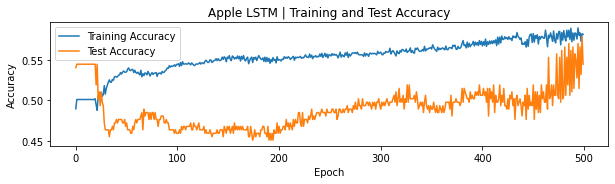

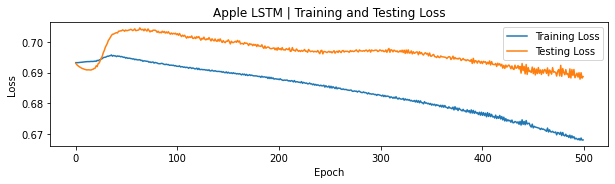

In [15]:
makePlots("Apple LSTM" , applHist)

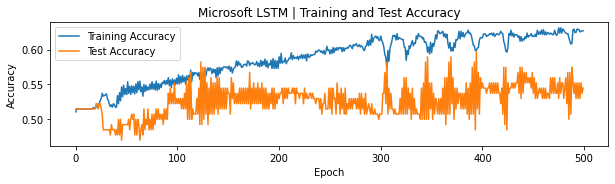

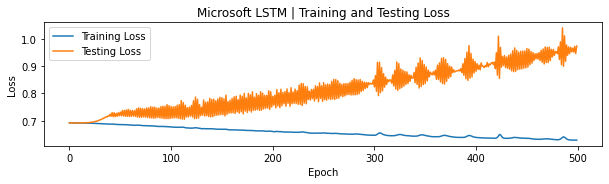

In [16]:
makePlots("Microsoft LSTM" , msftHist)

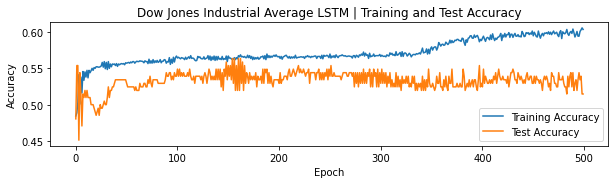

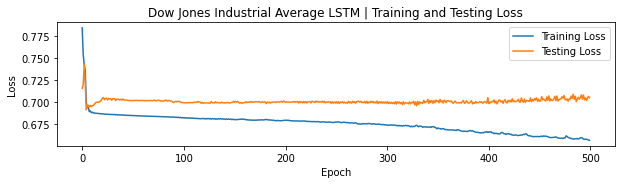

In [17]:
makePlots("Dow Jones Industrial Average LSTM" , djiaHist)

## Bidirectional LSTM

In [18]:
from keras.layers import TimeDistributed
from keras.layers import Bidirectional

def makeBidirectionalLSTM(xTrain):
    model = Sequential()
    
    model.add (Bidirectional(LSTM(units =128 , activation = 'relu', return_sequences=True),
                             input_shape=(xTrain.shape[1], xTrain.shape[2])))
    
#     model.add(Dropout(0.25))

    model.add (Bidirectional(LSTM(units = 64, activation = 'relu', return_sequences=True)))
    
#     model.add(Dropout(0.25))

    model.add (TimeDistributed(Dense (units = 1, activation = 'sigmoid')))
    opt = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer = opt, loss = "binary_crossentropy", metrics=['accuracy'])
    return model


### Make Bidirectional LSTM for Each Set

In [19]:
applBiLSTM = makeBidirectionalLSTM(xTrainAppl)
msftBiLSTM = makeBidirectionalLSTM(xTrainMsft)
djiaBiLSTM = makeBidirectionalLSTM(xTrainDjia)

### Fit Model for Each Set

In [20]:
applBiHist = applBiLSTM.fit(xTrainAppl, yTrainAppl, batch_size = 72, validation_data=(xTestAppl, yTestAppl), epochs = 500, shuffle=False)
msftBiHist = msftBiLSTM.fit(xTrainMsft, yTrainMsft, batch_size = 72, validation_data=(xTestMsft, yTestMsft), epochs = 500, shuffle=False)
djiaBiHist = djiaBiLSTM.fit(xTrainDjia, yTrainDjia, batch_size = 72, validation_data=(xTestDjia, yTestDjia), epochs = 500, shuffle=False)

Epoch 1/500
30/30 [==============================] - 0s 16ms/step - loss: 0.6933 - accuracy: 0.4825 - val_loss: 0.6932 - val_accuracy: 0.4678
Epoch 2/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5012 - val_loss: 0.6923 - val_accuracy: 0.5451
Epoch 3/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5012 - val_loss: 0.6918 - val_accuracy: 0.5451
Epoch 4/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.5012 - val_loss: 0.6915 - val_accuracy: 0.5451
Epoch 5/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5012 - val_loss: 0.6913 - val_accuracy: 0.5451
Epoch 6/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5012 - val_loss: 0.6912 - val_accuracy: 0.5451
Epoch 7/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.5012 - val_loss: 0.6910 - val_accuracy: 0.5451
Epoch 8/500


Epoch 59/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6895 - accuracy: 0.5491 - val_loss: 0.7009 - val_accuracy: 0.4592
Epoch 60/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6896 - accuracy: 0.5529 - val_loss: 0.7013 - val_accuracy: 0.4549
Epoch 61/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6889 - accuracy: 0.5481 - val_loss: 0.7002 - val_accuracy: 0.4592
Epoch 62/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6890 - accuracy: 0.5510 - val_loss: 0.7003 - val_accuracy: 0.4592
Epoch 63/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6884 - accuracy: 0.5505 - val_loss: 0.7000 - val_accuracy: 0.4592
Epoch 64/500
30/30 [==============================] - 0s 4ms/step - loss: 0.6886 - accuracy: 0.5472 - val_loss: 0.6999 - val_accuracy: 0.4635
Epoch 65/500
30/30 [==============================] - 0s 4ms/step - loss: 0.6885 - accuracy: 0.5558 - val_loss: 0.7002 - val_accuracy: 0.4592
Epoch 

30/30 [==============================] - 0s 3ms/step - loss: 0.6763 - accuracy: 0.5735 - val_loss: 0.6985 - val_accuracy: 0.4549
Epoch 117/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6759 - accuracy: 0.5773 - val_loss: 0.6983 - val_accuracy: 0.4592
Epoch 118/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6763 - accuracy: 0.5706 - val_loss: 0.6988 - val_accuracy: 0.4549
Epoch 119/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6756 - accuracy: 0.5744 - val_loss: 0.6977 - val_accuracy: 0.4635
Epoch 120/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6759 - accuracy: 0.5716 - val_loss: 0.6997 - val_accuracy: 0.4592
Epoch 121/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6757 - accuracy: 0.5687 - val_loss: 0.6982 - val_accuracy: 0.4678
Epoch 122/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6749 - accuracy: 0.5764 - val_loss: 0.6970 - val_accuracy: 0.4635
Epoch 123/500

30/30 [==============================] - 0s 3ms/step - loss: 0.6646 - accuracy: 0.5821 - val_loss: 0.7027 - val_accuracy: 0.4850
Epoch 174/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6652 - accuracy: 0.5831 - val_loss: 0.7002 - val_accuracy: 0.5064
Epoch 175/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6679 - accuracy: 0.5740 - val_loss: 0.7037 - val_accuracy: 0.4936
Epoch 176/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6643 - accuracy: 0.5792 - val_loss: 0.7023 - val_accuracy: 0.4936
Epoch 177/500
30/30 [==============================] - 0s 4ms/step - loss: 0.6628 - accuracy: 0.5854 - val_loss: 0.7011 - val_accuracy: 0.4893
Epoch 178/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6619 - accuracy: 0.5878 - val_loss: 0.7016 - val_accuracy: 0.4893
Epoch 179/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6610 - accuracy: 0.5893 - val_loss: 0.6996 - val_accuracy: 0.5150
Epoch 180/500

30/30 [==============================] - 0s 3ms/step - loss: 0.6490 - accuracy: 0.6065 - val_loss: 0.7092 - val_accuracy: 0.4592
Epoch 231/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6512 - accuracy: 0.6012 - val_loss: 0.7042 - val_accuracy: 0.5279
Epoch 232/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6485 - accuracy: 0.6041 - val_loss: 0.7028 - val_accuracy: 0.5193
Epoch 233/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6498 - accuracy: 0.6075 - val_loss: 0.7042 - val_accuracy: 0.5107
Epoch 234/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6519 - accuracy: 0.6046 - val_loss: 0.7029 - val_accuracy: 0.5193
Epoch 235/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6525 - accuracy: 0.6022 - val_loss: 0.7022 - val_accuracy: 0.5579
Epoch 236/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6525 - accuracy: 0.6012 - val_loss: 0.7024 - val_accuracy: 0.5365
Epoch 237/500

30/30 [==============================] - 0s 3ms/step - loss: 0.6407 - accuracy: 0.6223 - val_loss: 0.7173 - val_accuracy: 0.5279
Epoch 288/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6412 - accuracy: 0.6247 - val_loss: 0.7146 - val_accuracy: 0.5322
Epoch 289/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6419 - accuracy: 0.6209 - val_loss: 0.7150 - val_accuracy: 0.5451
Epoch 290/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6439 - accuracy: 0.6185 - val_loss: 0.7139 - val_accuracy: 0.5279
Epoch 291/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6473 - accuracy: 0.6075 - val_loss: 0.7164 - val_accuracy: 0.5451
Epoch 292/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6442 - accuracy: 0.6146 - val_loss: 0.7178 - val_accuracy: 0.5365
Epoch 293/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6433 - accuracy: 0.6132 - val_loss: 0.7202 - val_accuracy: 0.5408
Epoch 294/500

30/30 [==============================] - 0s 3ms/step - loss: 0.6174 - accuracy: 0.6462 - val_loss: 0.7435 - val_accuracy: 0.5064
Epoch 345/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6212 - accuracy: 0.6362 - val_loss: 0.7521 - val_accuracy: 0.4979
Epoch 346/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6257 - accuracy: 0.6410 - val_loss: 0.7482 - val_accuracy: 0.4979
Epoch 347/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6308 - accuracy: 0.6324 - val_loss: 0.7578 - val_accuracy: 0.4936
Epoch 348/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6335 - accuracy: 0.6285 - val_loss: 0.7482 - val_accuracy: 0.4936
Epoch 349/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6314 - accuracy: 0.6252 - val_loss: 0.7330 - val_accuracy: 0.4979
Epoch 350/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6251 - accuracy: 0.6338 - val_loss: 0.7327 - val_accuracy: 0.5064
Epoch 351/500

30/30 [==============================] - 0s 4ms/step - loss: 0.6211 - accuracy: 0.6381 - val_loss: 0.7393 - val_accuracy: 0.5494
Epoch 402/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6124 - accuracy: 0.6472 - val_loss: 0.7367 - val_accuracy: 0.5236
Epoch 403/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6098 - accuracy: 0.6558 - val_loss: 0.7417 - val_accuracy: 0.5365
Epoch 404/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6094 - accuracy: 0.6539 - val_loss: 0.7479 - val_accuracy: 0.5322
Epoch 405/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6106 - accuracy: 0.6553 - val_loss: 0.7485 - val_accuracy: 0.5579
Epoch 406/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6185 - accuracy: 0.6477 - val_loss: 0.7554 - val_accuracy: 0.5279
Epoch 407/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6206 - accuracy: 0.6434 - val_loss: 0.7687 - val_accuracy: 0.5064
Epoch 408/500

30/30 [==============================] - 0s 4ms/step - loss: 0.6004 - accuracy: 0.6644 - val_loss: 0.7510 - val_accuracy: 0.5236
Epoch 459/500
30/30 [==============================] - 0s 3ms/step - loss: 0.5970 - accuracy: 0.6683 - val_loss: 0.7683 - val_accuracy: 0.5408
Epoch 460/500
30/30 [==============================] - 0s 3ms/step - loss: 0.5996 - accuracy: 0.6596 - val_loss: 0.7532 - val_accuracy: 0.5150
Epoch 461/500
30/30 [==============================] - 0s 4ms/step - loss: 0.5968 - accuracy: 0.6659 - val_loss: 0.7536 - val_accuracy: 0.5279
Epoch 462/500
30/30 [==============================] - 0s 4ms/step - loss: 0.5977 - accuracy: 0.6649 - val_loss: 0.7468 - val_accuracy: 0.5150
Epoch 463/500
30/30 [==============================] - 0s 4ms/step - loss: 0.5961 - accuracy: 0.6702 - val_loss: 0.7516 - val_accuracy: 0.5150
Epoch 464/500
30/30 [==============================] - 0s 3ms/step - loss: 0.5957 - accuracy: 0.6644 - val_loss: 0.7500 - val_accuracy: 0.5279
Epoch 465/500

17/17 [==============================] - 0s 4ms/step - loss: 0.6915 - accuracy: 0.5240 - val_loss: 0.6948 - val_accuracy: 0.5149
Epoch 16/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6913 - accuracy: 0.5315 - val_loss: 0.6957 - val_accuracy: 0.4851
Epoch 17/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6910 - accuracy: 0.5357 - val_loss: 0.6966 - val_accuracy: 0.4627
Epoch 18/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6908 - accuracy: 0.5373 - val_loss: 0.6979 - val_accuracy: 0.4701
Epoch 19/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6904 - accuracy: 0.5373 - val_loss: 0.6995 - val_accuracy: 0.4776
Epoch 20/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6901 - accuracy: 0.5265 - val_loss: 0.7016 - val_accuracy: 0.4925
Epoch 21/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6897 - accuracy: 0.5240 - val_loss: 0.7041 - val_accuracy: 0.4851
Epoch 22/500
17/17 

Epoch 73/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6717 - accuracy: 0.5730 - val_loss: 0.7357 - val_accuracy: 0.5224
Epoch 74/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6705 - accuracy: 0.5871 - val_loss: 0.7566 - val_accuracy: 0.5224
Epoch 75/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6692 - accuracy: 0.5862 - val_loss: 0.7484 - val_accuracy: 0.5299
Epoch 76/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6688 - accuracy: 0.5804 - val_loss: 0.7682 - val_accuracy: 0.5224
Epoch 77/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6671 - accuracy: 0.5896 - val_loss: 0.7579 - val_accuracy: 0.5224
Epoch 78/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6669 - accuracy: 0.5854 - val_loss: 0.7771 - val_accuracy: 0.5224
Epoch 79/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6663 - accuracy: 0.5779 - val_loss: 0.7785 - val_accuracy: 0.5224
Epoch 

17/17 [==============================] - 0s 4ms/step - loss: 0.6583 - accuracy: 0.6020 - val_loss: 0.9177 - val_accuracy: 0.5373
Epoch 131/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6548 - accuracy: 0.5920 - val_loss: 0.8817 - val_accuracy: 0.5373
Epoch 132/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6502 - accuracy: 0.5978 - val_loss: 0.9007 - val_accuracy: 0.5522
Epoch 133/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6486 - accuracy: 0.5995 - val_loss: 0.8996 - val_accuracy: 0.5373
Epoch 134/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6539 - accuracy: 0.5871 - val_loss: 0.8333 - val_accuracy: 0.5672
Epoch 135/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6594 - accuracy: 0.5854 - val_loss: 0.9390 - val_accuracy: 0.5299
Epoch 136/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6630 - accuracy: 0.5813 - val_loss: 0.7797 - val_accuracy: 0.5597
Epoch 137/500

17/17 [==============================] - 0s 4ms/step - loss: 0.6332 - accuracy: 0.6252 - val_loss: 1.0041 - val_accuracy: 0.5672
Epoch 188/500
17/17 [==============================] - 0s 5ms/step - loss: 0.6313 - accuracy: 0.6277 - val_loss: 0.9946 - val_accuracy: 0.5597
Epoch 189/500
17/17 [==============================] - 0s 5ms/step - loss: 0.6311 - accuracy: 0.6302 - val_loss: 1.0394 - val_accuracy: 0.5821
Epoch 190/500
17/17 [==============================] - 0s 5ms/step - loss: 0.6297 - accuracy: 0.6368 - val_loss: 1.0145 - val_accuracy: 0.5746
Epoch 191/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6292 - accuracy: 0.6219 - val_loss: 1.0419 - val_accuracy: 0.5672
Epoch 192/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6288 - accuracy: 0.6244 - val_loss: 1.0276 - val_accuracy: 0.5672
Epoch 193/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6275 - accuracy: 0.6335 - val_loss: 1.0451 - val_accuracy: 0.5746
Epoch 194/500

17/17 [==============================] - 0s 4ms/step - loss: 0.6163 - accuracy: 0.6368 - val_loss: 1.1755 - val_accuracy: 0.5672
Epoch 245/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6166 - accuracy: 0.6327 - val_loss: 1.0123 - val_accuracy: 0.5672
Epoch 246/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6156 - accuracy: 0.6459 - val_loss: 1.1908 - val_accuracy: 0.5448
Epoch 247/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6135 - accuracy: 0.6385 - val_loss: 1.0193 - val_accuracy: 0.5672
Epoch 248/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6126 - accuracy: 0.6542 - val_loss: 1.1669 - val_accuracy: 0.5746
Epoch 249/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6170 - accuracy: 0.6269 - val_loss: 0.9821 - val_accuracy: 0.5672
Epoch 250/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6194 - accuracy: 0.6418 - val_loss: 1.1820 - val_accuracy: 0.5746
Epoch 251/500

17/17 [==============================] - 0s 4ms/step - loss: 0.6205 - accuracy: 0.6418 - val_loss: 1.1073 - val_accuracy: 0.5448
Epoch 302/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6067 - accuracy: 0.6426 - val_loss: 1.0542 - val_accuracy: 0.5448
Epoch 303/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6022 - accuracy: 0.6617 - val_loss: 1.1364 - val_accuracy: 0.5448
Epoch 304/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6003 - accuracy: 0.6434 - val_loss: 1.0922 - val_accuracy: 0.5522
Epoch 305/500
17/17 [==============================] - 0s 4ms/step - loss: 0.5993 - accuracy: 0.6609 - val_loss: 1.1789 - val_accuracy: 0.5522
Epoch 306/500
17/17 [==============================] - 0s 4ms/step - loss: 0.5986 - accuracy: 0.6468 - val_loss: 1.1150 - val_accuracy: 0.5448
Epoch 307/500
17/17 [==============================] - 0s 4ms/step - loss: 0.5985 - accuracy: 0.6609 - val_loss: 1.2027 - val_accuracy: 0.5597
Epoch 308/500

17/17 [==============================] - 0s 4ms/step - loss: 0.5927 - accuracy: 0.6551 - val_loss: 1.2583 - val_accuracy: 0.5149
Epoch 359/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6033 - accuracy: 0.6551 - val_loss: 1.3020 - val_accuracy: 0.5597
Epoch 360/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6021 - accuracy: 0.6443 - val_loss: 1.1682 - val_accuracy: 0.5597
Epoch 361/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6023 - accuracy: 0.6401 - val_loss: 1.2598 - val_accuracy: 0.5448
Epoch 362/500
17/17 [==============================] - 0s 4ms/step - loss: 0.5959 - accuracy: 0.6459 - val_loss: 1.2867 - val_accuracy: 0.5299
Epoch 363/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6041 - accuracy: 0.6443 - val_loss: 1.0711 - val_accuracy: 0.5299
Epoch 364/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6211 - accuracy: 0.6269 - val_loss: 1.3988 - val_accuracy: 0.5149
Epoch 365/500

17/17 [==============================] - 0s 4ms/step - loss: 0.6123 - accuracy: 0.6260 - val_loss: 1.1344 - val_accuracy: 0.5299
Epoch 416/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6078 - accuracy: 0.6443 - val_loss: 1.3194 - val_accuracy: 0.5224
Epoch 417/500
17/17 [==============================] - 0s 4ms/step - loss: 0.5837 - accuracy: 0.6808 - val_loss: 1.3316 - val_accuracy: 0.5149
Epoch 418/500
17/17 [==============================] - 0s 4ms/step - loss: 0.5733 - accuracy: 0.6675 - val_loss: 1.3218 - val_accuracy: 0.5522
Epoch 419/500
17/17 [==============================] - 0s 4ms/step - loss: 0.5714 - accuracy: 0.6716 - val_loss: 1.4179 - val_accuracy: 0.5075
Epoch 420/500
17/17 [==============================] - 0s 4ms/step - loss: 0.5742 - accuracy: 0.6783 - val_loss: 1.3166 - val_accuracy: 0.5373
Epoch 421/500
17/17 [==============================] - 0s 4ms/step - loss: 0.5775 - accuracy: 0.6700 - val_loss: 1.4398 - val_accuracy: 0.5373
Epoch 422/500

17/17 [==============================] - 0s 4ms/step - loss: 0.5750 - accuracy: 0.6625 - val_loss: 1.6245 - val_accuracy: 0.5224
Epoch 473/500
17/17 [==============================] - 0s 4ms/step - loss: 0.5772 - accuracy: 0.6600 - val_loss: 1.2848 - val_accuracy: 0.5299
Epoch 474/500
17/17 [==============================] - 0s 4ms/step - loss: 0.5747 - accuracy: 0.6675 - val_loss: 1.5334 - val_accuracy: 0.5597
Epoch 475/500
17/17 [==============================] - 0s 4ms/step - loss: 0.5640 - accuracy: 0.6874 - val_loss: 1.4688 - val_accuracy: 0.5000
Epoch 476/500
17/17 [==============================] - 0s 4ms/step - loss: 0.5603 - accuracy: 0.6849 - val_loss: 1.5322 - val_accuracy: 0.5597
Epoch 477/500
17/17 [==============================] - 0s 4ms/step - loss: 0.5674 - accuracy: 0.6766 - val_loss: 1.5390 - val_accuracy: 0.5224
Epoch 478/500
17/17 [==============================] - 0s 4ms/step - loss: 0.5663 - accuracy: 0.6733 - val_loss: 1.4191 - val_accuracy: 0.5448
Epoch 479/500

26/26 [==============================] - 0s 4ms/step - loss: 0.6853 - accuracy: 0.5577 - val_loss: 0.6927 - val_accuracy: 0.5539
Epoch 30/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6850 - accuracy: 0.5599 - val_loss: 0.6935 - val_accuracy: 0.5343
Epoch 31/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6852 - accuracy: 0.5577 - val_loss: 0.6918 - val_accuracy: 0.5637
Epoch 32/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6851 - accuracy: 0.5512 - val_loss: 0.6916 - val_accuracy: 0.5539
Epoch 33/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6849 - accuracy: 0.5621 - val_loss: 0.6923 - val_accuracy: 0.5637
Epoch 34/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6841 - accuracy: 0.5687 - val_loss: 0.6960 - val_accuracy: 0.5392
Epoch 35/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6843 - accuracy: 0.5621 - val_loss: 0.6927 - val_accuracy: 0.5637
Epoch 36/500
26/26 

Epoch 87/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6782 - accuracy: 0.5654 - val_loss: 0.6903 - val_accuracy: 0.5588
Epoch 88/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6799 - accuracy: 0.5583 - val_loss: 0.7006 - val_accuracy: 0.5392
Epoch 89/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6770 - accuracy: 0.5742 - val_loss: 0.6937 - val_accuracy: 0.5588
Epoch 90/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6763 - accuracy: 0.5692 - val_loss: 0.7001 - val_accuracy: 0.5196
Epoch 91/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6768 - accuracy: 0.5687 - val_loss: 0.6923 - val_accuracy: 0.5539
Epoch 92/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6778 - accuracy: 0.5638 - val_loss: 0.6998 - val_accuracy: 0.5245
Epoch 93/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6766 - accuracy: 0.5731 - val_loss: 0.6913 - val_accuracy: 0.5539
Epoch 

26/26 [==============================] - 0s 4ms/step - loss: 0.6695 - accuracy: 0.5889 - val_loss: 0.6939 - val_accuracy: 0.5441
Epoch 145/500
26/26 [==============================] - 0s 3ms/step - loss: 0.6694 - accuracy: 0.5681 - val_loss: 0.7006 - val_accuracy: 0.5392
Epoch 146/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6696 - accuracy: 0.5873 - val_loss: 0.6944 - val_accuracy: 0.5343
Epoch 147/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6697 - accuracy: 0.5687 - val_loss: 0.7010 - val_accuracy: 0.5294
Epoch 148/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6690 - accuracy: 0.5878 - val_loss: 0.6956 - val_accuracy: 0.5196
Epoch 149/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6690 - accuracy: 0.5703 - val_loss: 0.7013 - val_accuracy: 0.5343
Epoch 150/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6692 - accuracy: 0.5868 - val_loss: 0.6953 - val_accuracy: 0.5196
Epoch 151/500

26/26 [==============================] - 0s 4ms/step - loss: 0.6582 - accuracy: 0.5878 - val_loss: 0.7109 - val_accuracy: 0.5245
Epoch 202/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6591 - accuracy: 0.6010 - val_loss: 0.7100 - val_accuracy: 0.5343
Epoch 203/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6588 - accuracy: 0.5884 - val_loss: 0.7125 - val_accuracy: 0.5098
Epoch 204/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6599 - accuracy: 0.5988 - val_loss: 0.7100 - val_accuracy: 0.5392
Epoch 205/500
26/26 [==============================] - 0s 3ms/step - loss: 0.6604 - accuracy: 0.5818 - val_loss: 0.7103 - val_accuracy: 0.5245
Epoch 206/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6602 - accuracy: 0.6043 - val_loss: 0.7094 - val_accuracy: 0.5343
Epoch 207/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6600 - accuracy: 0.5829 - val_loss: 0.7112 - val_accuracy: 0.5294
Epoch 208/500

26/26 [==============================] - 0s 4ms/step - loss: 0.6498 - accuracy: 0.5966 - val_loss: 0.7173 - val_accuracy: 0.5441
Epoch 259/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6496 - accuracy: 0.6010 - val_loss: 0.7196 - val_accuracy: 0.5343
Epoch 260/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6500 - accuracy: 0.6026 - val_loss: 0.7187 - val_accuracy: 0.5441
Epoch 261/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6490 - accuracy: 0.6004 - val_loss: 0.7223 - val_accuracy: 0.5294
Epoch 262/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6491 - accuracy: 0.5982 - val_loss: 0.7209 - val_accuracy: 0.5245
Epoch 263/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6492 - accuracy: 0.6010 - val_loss: 0.7210 - val_accuracy: 0.5343
Epoch 264/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6474 - accuracy: 0.6015 - val_loss: 0.7170 - val_accuracy: 0.5441
Epoch 265/500

26/26 [==============================] - 0s 4ms/step - loss: 0.6388 - accuracy: 0.6037 - val_loss: 0.7321 - val_accuracy: 0.5294
Epoch 316/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6382 - accuracy: 0.6097 - val_loss: 0.7385 - val_accuracy: 0.5441
Epoch 317/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6372 - accuracy: 0.6076 - val_loss: 0.7360 - val_accuracy: 0.5196
Epoch 318/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6376 - accuracy: 0.6125 - val_loss: 0.7388 - val_accuracy: 0.5441
Epoch 319/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6383 - accuracy: 0.6081 - val_loss: 0.7348 - val_accuracy: 0.5294
Epoch 320/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6371 - accuracy: 0.6103 - val_loss: 0.7351 - val_accuracy: 0.5539
Epoch 321/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6376 - accuracy: 0.6114 - val_loss: 0.7340 - val_accuracy: 0.5196
Epoch 322/500

26/26 [==============================] - 0s 4ms/step - loss: 0.6312 - accuracy: 0.6185 - val_loss: 0.7619 - val_accuracy: 0.5539
Epoch 373/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6300 - accuracy: 0.6163 - val_loss: 0.7493 - val_accuracy: 0.5049
Epoch 374/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6300 - accuracy: 0.6158 - val_loss: 0.7583 - val_accuracy: 0.5490
Epoch 375/500
26/26 [==============================] - 0s 5ms/step - loss: 0.6285 - accuracy: 0.6190 - val_loss: 0.7528 - val_accuracy: 0.5000
Epoch 376/500
26/26 [==============================] - 0s 5ms/step - loss: 0.6273 - accuracy: 0.6207 - val_loss: 0.7611 - val_accuracy: 0.5441
Epoch 377/500
26/26 [==============================] - 0s 5ms/step - loss: 0.6280 - accuracy: 0.6147 - val_loss: 0.7434 - val_accuracy: 0.5294
Epoch 378/500
26/26 [==============================] - 0s 5ms/step - loss: 0.6267 - accuracy: 0.6251 - val_loss: 0.7554 - val_accuracy: 0.5588
Epoch 379/500

26/26 [==============================] - 0s 4ms/step - loss: 0.6115 - accuracy: 0.6382 - val_loss: 0.7640 - val_accuracy: 0.4951
Epoch 430/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6143 - accuracy: 0.6448 - val_loss: 0.7726 - val_accuracy: 0.5343
Epoch 431/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6163 - accuracy: 0.6305 - val_loss: 0.7722 - val_accuracy: 0.5147
Epoch 432/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6128 - accuracy: 0.6415 - val_loss: 0.7682 - val_accuracy: 0.5392
Epoch 433/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6144 - accuracy: 0.6382 - val_loss: 0.7653 - val_accuracy: 0.5098
Epoch 434/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6097 - accuracy: 0.6426 - val_loss: 0.7647 - val_accuracy: 0.5098
Epoch 435/500
26/26 [==============================] - 0s 4ms/step - loss: 0.6078 - accuracy: 0.6448 - val_loss: 0.7679 - val_accuracy: 0.5196
Epoch 436/500

26/26 [==============================] - 0s 4ms/step - loss: 0.5949 - accuracy: 0.6524 - val_loss: 0.7681 - val_accuracy: 0.5245
Epoch 487/500
26/26 [==============================] - 0s 4ms/step - loss: 0.5948 - accuracy: 0.6563 - val_loss: 0.7909 - val_accuracy: 0.5049
Epoch 488/500
26/26 [==============================] - 0s 4ms/step - loss: 0.5946 - accuracy: 0.6524 - val_loss: 0.7814 - val_accuracy: 0.5343
Epoch 489/500
26/26 [==============================] - 0s 4ms/step - loss: 0.5968 - accuracy: 0.6524 - val_loss: 0.7797 - val_accuracy: 0.5294
Epoch 490/500
26/26 [==============================] - 0s 4ms/step - loss: 0.5948 - accuracy: 0.6475 - val_loss: 0.7924 - val_accuracy: 0.5049
Epoch 491/500
26/26 [==============================] - 0s 4ms/step - loss: 0.5951 - accuracy: 0.6513 - val_loss: 0.7703 - val_accuracy: 0.5294
Epoch 492/500
26/26 [==============================] - 0s 4ms/step - loss: 0.5988 - accuracy: 0.6535 - val_loss: 0.8040 - val_accuracy: 0.5392
Epoch 493/500

### Make Plots to Evaluate Each Model

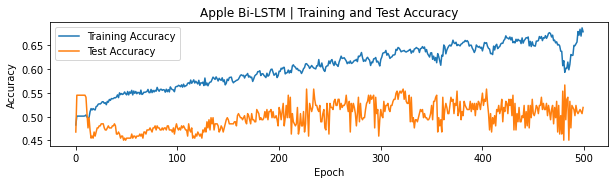

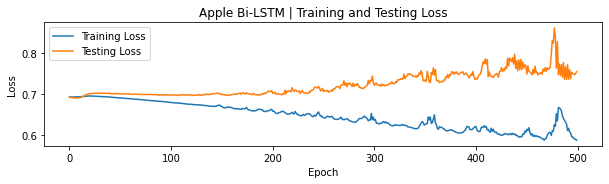

In [21]:
makePlots("Apple Bi-LSTM" , applBiHist)

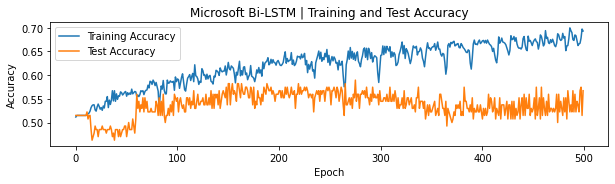

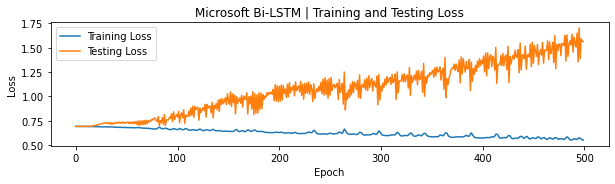

In [22]:
makePlots("Microsoft Bi-LSTM" , msftBiHist)

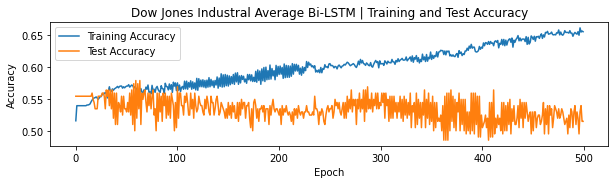

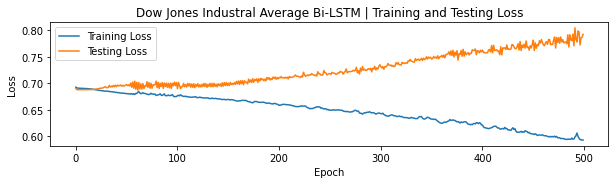

In [23]:
makePlots("Dow Jones Industral Average Bi-LSTM" , djiaBiHist)